In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Prpject machine Learning\\loan (2).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
521,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
522,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
523,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Information about DataSet

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            525 non-null    object 
 1   Gender             514 non-null    object 
 2   Married            523 non-null    object 
 3   Dependents         511 non-null    object 
 4   Education          525 non-null    object 
 5   Self_Employed      499 non-null    object 
 6   ApplicantIncome    525 non-null    int64  
 7   CoapplicantIncome  525 non-null    float64
 8   LoanAmount         506 non-null    float64
 9   Loan_Amount_Term   513 non-null    float64
 10  Credit_History     483 non-null    float64
 11  Property_Area      525 non-null    object 
 12  Loan_Status        525 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.4+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,525.000000,525.000000,506.000000,513.000000,483.000000
mean,5347.470476,1644.652952,149.262846,342.456140,0.855072
std,5400.249465,2886.846621,89.118700,66.858428,0.352393
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2929.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1250.000000,128.000000,360.000000,1.000000
75%,5746.000000,2336.000000,172.000000,360.000000,1.000000
max,63337.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               2
Dependents           14
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.count()

Loan_ID              525
Gender               514
Married              523
Dependents           511
Education            525
Self_Employed        499
ApplicantIncome      525
CoapplicantIncome    525
LoanAmount           506
Loan_Amount_Term     513
Credit_History       483
Property_Area        525
Loan_Status          525
dtype: int64

In [7]:
df.shape

(525, 13)

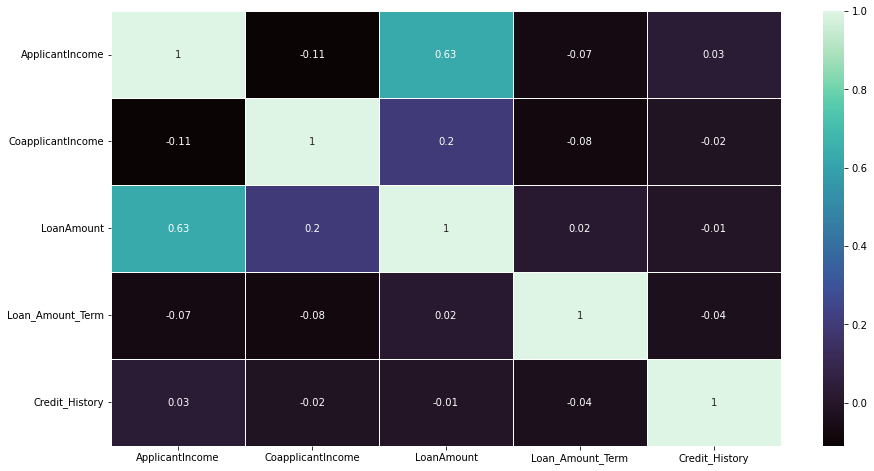

In [8]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.5,cmap="mako")
plt.show()

# DATASET ANALYSIS AND VISUALIZATION

# Filling Null Values

In [9]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Removing unnecessary columns

In [12]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

# Removing Outliers

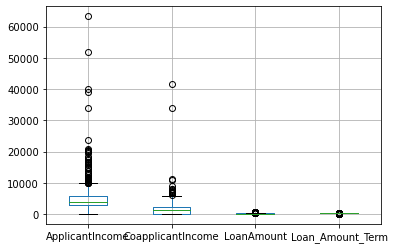

In [13]:
df.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'], axis= 1).boxplot()
plt.show()

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\4164221764.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


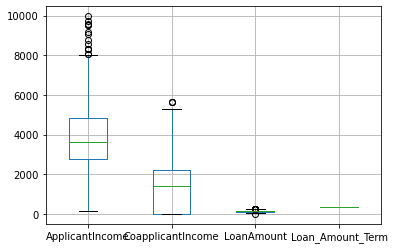

In [15]:
df.drop(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'], axis= 1).boxplot()
plt.show()

In [16]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'Married':{'Yes':1,"No":0}},inplace=True)
df.replace({'Education':{'Graduate':1,"Not Graduate":0}},inplace=True)
df.replace({'Self_Employed':{'Yes':1,"No":0}},inplace=True)
df.replace({'Loan_Status':{'Y':1,"N":0}},inplace=True)
df.replace({'Dependents':{'3+':4}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Married':{'Yes':1,"No":0}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,149.262846,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
518,1,1,2,0,0,3987,1411.0,157.000000,360.0,1.0,0,1
519,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,0,1
520,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
522,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1


# Histogram

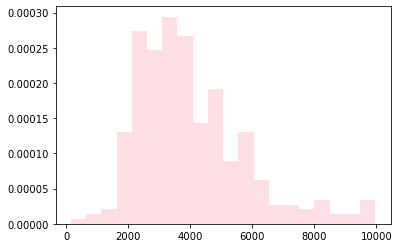

In [18]:
plt.hist(df['ApplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

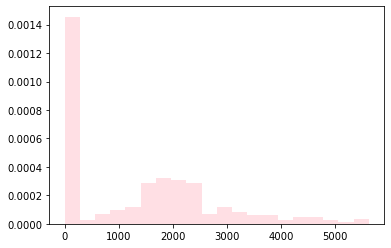

In [19]:
plt.hist(df['CoapplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

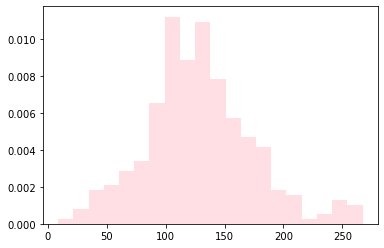

In [20]:
plt.hist(df['LoanAmount'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

# Normally Distributed Data

In [21]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\1076979511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\1076979511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\1076979511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

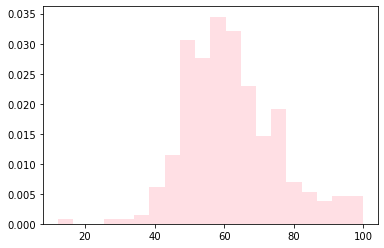

In [22]:
plt.hist(df['ApplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

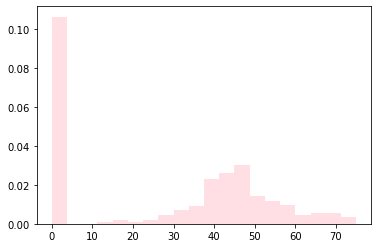

In [23]:
plt.hist(df['CoapplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

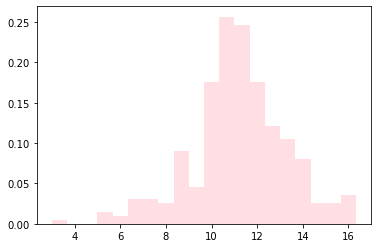

In [24]:
plt.hist(df['LoanAmount'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

# Smote Technique

In [25]:
x = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
x, y = SMOTE().fit_resample(x, y)

# Data Normalization

In [26]:
x = MinMaxScaler().fit_transform(x)

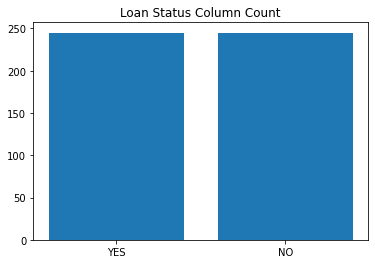

In [27]:
plt.bar(['YES','NO'], y.value_counts())
plt.title("Loan Status Column Count")
plt.show()

# MACHINE LEARNING

In [28]:
X=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
y=['Loan_Status']
X=df[X]
y=df[y]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (208, 11)
x_test shape:  (90, 11)
y_train shape:  (208, 1)
y_test shape:  (90, 1)


In [31]:
y_test.value_counts()

Loan_Status
1              71
0              19
dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
RF = RandomForestClassifier(n_estimators=200, criterion='entropy',random_state=42)

In [265]:
RF.fit(x_train,y_train)

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42)

In [266]:
prediction = RF.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.80      0.99      0.89        71

    accuracy                           0.80        90
   macro avg       0.74      0.55      0.53        90
weighted avg       0.78      0.80      0.74        90



In [268]:
RF.score(x_test,y_test)

0.8

In [269]:
RF.score(x_train,y_train)

1.0

In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
param = {'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}


In [272]:
grid = GridSearchCV(RF, param_grid=param, cv= 5)
grid.fit(x_train, y_train)

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=200,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [273]:
pred = grid.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [274]:
grid.score(x_test,y_test)

0.7888888888888889

In [275]:
grid.score(x_train,y_train)

0.8413461538461539

In [276]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [277]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.80      0.99      0.89        71

    accuracy                           0.80        90
   macro avg       0.74      0.55      0.53        90
weighted avg       0.78      0.80      0.74        90



In [278]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import f1_score,roc_curve,auc

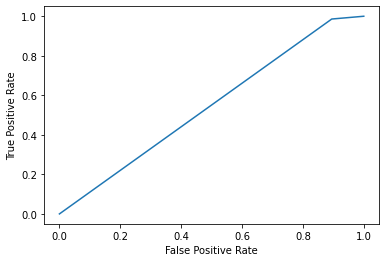

In [279]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test,prediction)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

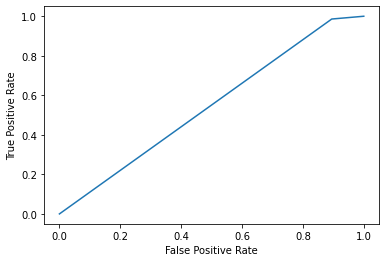

In [280]:
fpr,tpr,_ = metrics.roc_curve(y_test,prediction)
auc = metrics.roc_auc_score(y_test,prediction)
plt.plot(fpr,tpr,label = 'AUC'+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [281]:
scores = cross_val_score(RF, x_train, y_train,
                         cv=5, scoring = 'f1')
print ("mean validation F1 for Random Forests:",
       "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
RF = RF.fit(x_train, y_train)
Y_pred = RF.predict(x_test)
f1 = f1_score(y_test, Y_pred)
print ('Test F1 for Random Forests :', f1)

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

mean validation F1 for Random Forests: 0.90 (+/- 0.03)


C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test F1 for Random Forests : 0.8860759493670887


In [50]:
HT = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\loan_test_hidden.csv")

In [51]:
HT

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban
1,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban
2,LP002250,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,Rural
3,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural
4,LP002262,Male,Yes,3+,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...
65,LP002500,Male,Yes,3+,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban
66,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban
67,LP002515,Male,Yes,1,Graduate,Yes,3450,2079.0,162.0,360.0,1.0,Semiurban
68,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural


In [52]:
HT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            70 non-null     object 
 1   Gender             70 non-null     object 
 2   Married            70 non-null     object 
 3   Dependents         70 non-null     object 
 4   Education          70 non-null     object 
 5   Self_Employed      70 non-null     object 
 6   ApplicantIncome    70 non-null     int64  
 7   CoapplicantIncome  70 non-null     float64
 8   LoanAmount         70 non-null     float64
 9   Loan_Amount_Term   70 non-null     float64
 10  Credit_History     70 non-null     float64
 11  Property_Area      70 non-null     object 
dtypes: float64(4), int64(1), object(7)
memory usage: 6.7+ KB


In [53]:
HT.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
LP002239  Male    No       0           Not Graduate  No             2346             1600.0             132.0       360.0             1.0             Semiurban        1
LP002407  Female  Yes      0           Not Graduate  Yes            7142             0.0                138.0       360.0             1.0             Rural            1
LP002434  Male    Yes      2           Not Graduate  No             4652             0.0                110.0       360.0             1.0             Rural            1
LP002429  Male    Yes      1           Graduate      Yes            3466             1210.0             130.0       360.0             1.0             Rural            1
LP002422  Male    No       1           Graduate      No             37719            0.0                152.0       360.0             1.0             Semiurban 

In [54]:
HT.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,5916.128571,1482.401714,127.900000,340.285714,0.771429
std,10254.759186,3410.333310,52.491034,54.745033,0.422944
min,1025.000000,0.000000,45.000000,180.000000,0.000000
25%,2613.250000,0.000000,98.500000,360.000000,1.000000
50%,3684.000000,0.000000,119.500000,360.000000,1.000000
75%,5908.500000,1824.750000,150.000000,360.000000,1.000000
max,81000.000000,20000.000000,360.000000,360.000000,1.000000


In [55]:
HT.shape

(70, 12)

In [56]:
HT.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

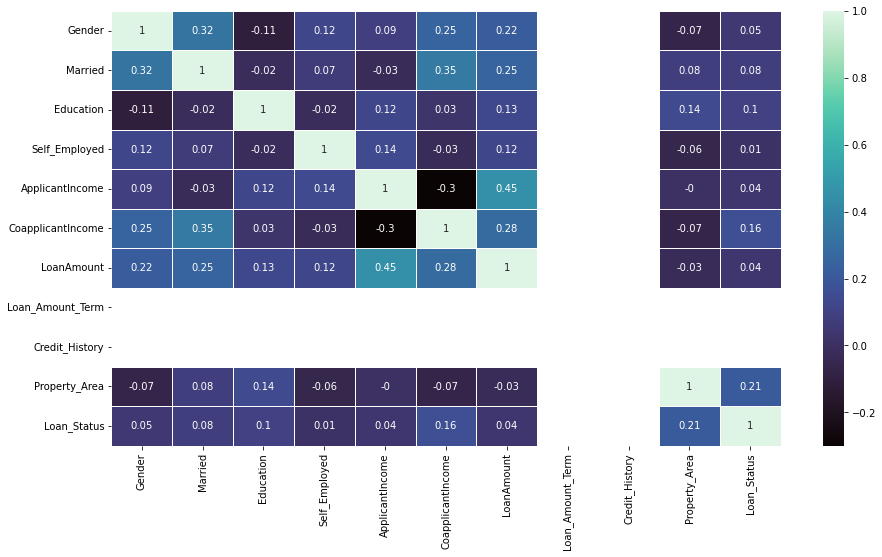

In [57]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.5,cmap="mako")
plt.show()

# Removing Unnecessary Columns

In [58]:
HT.drop(columns=['Loan_ID'],axis=1,inplace=True)

# Histogram

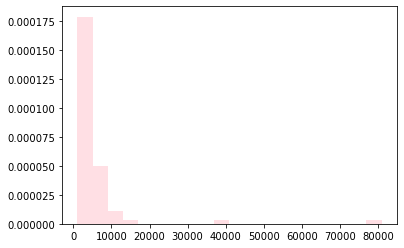

In [59]:
plt.hist(HT['ApplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

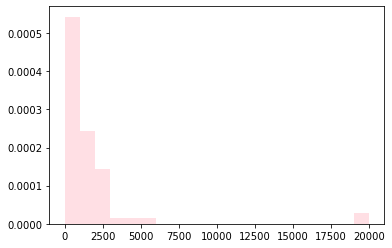

In [60]:
plt.hist(HT['CoapplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

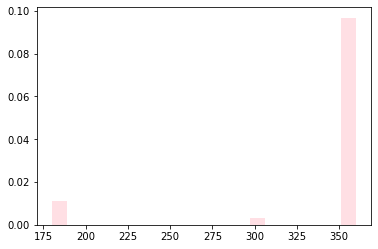

In [61]:
plt.hist(HT['Loan_Amount_Term'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

# Normally Distributed Data

In [62]:
HT['ApplicantIncome']=np.sqrt(HT['ApplicantIncome'])
HT['CoapplicantIncome']=np.sqrt(HT['CoapplicantIncome'])
HT['LoanAmount']=np.sqrt(HT['LoanAmount'])

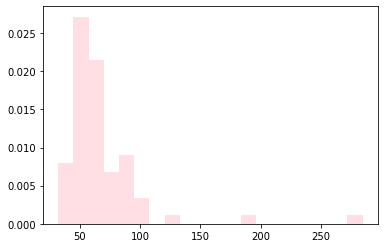

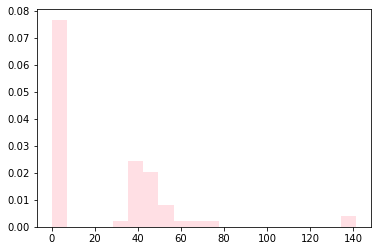

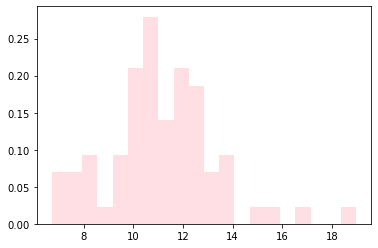

In [63]:
plt.hist(HT['ApplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()
plt.hist(HT['CoapplicantIncome'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()
plt.hist(HT['LoanAmount'],bins =20,density=True,alpha=0.5, histtype='bar', color='pink')
plt.show()

In [64]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
df.replace({'Married':{'Yes':1,"No":0}},inplace=True)
df.replace({'Education':{'Graduate':1,"Not Graduate":0}},inplace=True)
df.replace({'Self_Employed':{'Yes':1,"No":0}},inplace=True)
df.replace({'Loan_Status':{'Y':1,"N":0}},inplace=True)
df.replace({'Dependents':{'3+':4}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Married':{'Yes':1,"No":0}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_57148\106864052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

# Machine Learning

In [65]:
RF = RandomForestClassifier(n_estimators=200, criterion='entropy')

In [66]:
RF.fit(x_train,y_train)

C:\Users\Lenovo\Downloads\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [67]:
pred_HT = RF.predict(x_test)

In [68]:
pred_HT

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [69]:
prediction = pd.DataFrame(pred_HT)

In [70]:
prediction.to_csv('prediction_Habiba.csv',index=False)